In [14]:
from sklearn.datasets import make_biclusters
import matplotlib.pyplot as plt
import numpy as np

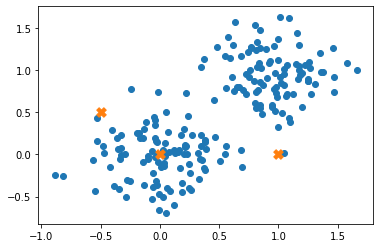

In [52]:
noise = 0.3
X, y, _ = make_biclusters((200, 2), 2, noise=noise, 
                       random_state=314, minval=0, maxval=1)

mu = np.array([
    [1, 0],
    [-0.5, 0.5],
    [0, 0]
])

plt.scatter(*X.T)
plt.scatter(*mu.T, s=90, marker='X')

In [53]:
print(X.shape)
print(mu.shape)

(200, 2)
(3, 2)


In [55]:
D = (X[:,np.newaxis] - mu) ** 2
r = D.sum(axis=-1)
r = r.argmin(axis=1)
r

array([2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 2, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 2, 0,
       0, 2, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 1,
       0, 2, 0, 2, 2, 0, 2, 0, 0, 1, 1, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 1,
       0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 1, 2, 0, 1,
       1, 2, 2, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 1,
       2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 1, 2, 2, 0, 0, 0, 2,
       2, 0])

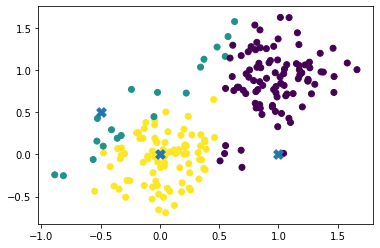

In [56]:
plt.scatter(*X.T, c=r)
plt.scatter(*mu.T, s=90, marker='X')

In [58]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
ind = ohe.fit_transform(r[:, np.newaxis])
ind.shape

(200, 3)

In [60]:
Nk = ind.sum(axis=0)
Nk

array([95., 19., 86.])